In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install mlxtend

In [3]:
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

### Data Loading & Initial Exploration

In [4]:
df = pd.read_excel("Online Retail.xlsx")

In [5]:
print("Shape of dataset:", df.shape)
print(df.head())
print(df.info())
print(df.describe())

Shape of dataset: (541909, 8)
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         

 Data Cleaning

In [7]:
# Drop rows with missing critical fields
df = df.dropna(subset=['InvoiceNo', 'Description', 'CustomerID'])

# Filter out cancelled invoices and make a copy to avoid SettingWithCopyWarning
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')].copy()

# Now it's safe to strip whitespace
df['Description'] = df['Description'].str.strip()

# Drop duplicates
df.drop_duplicates(inplace=True)

In [8]:
basket = df[df['Country'] == 'United Kingdom'].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

print("Basket sample:")
print(basket.head())

/tmp/ipython-input-927379077.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Basket sample:
Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536365                            0                           0   
536366                            0                           0   
536367                            0                           0   
536368                            0                           0   
536369                            0                           0   

Description  12 DAISY PEGS IN WOOD BOX  12 EGG HOUSE PAINTED WOOD  \
InvoiceNo                                                           
536365                               0                          0   
536366                               0                          0   
536367                               0                          0   
536368                               0                          0   
536369                               0                          0   

Description  12 HANGING EGGS HA

/tmp/ipython-input-2451321747.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_frequencies.values, y=item_frequencies.index, palette="viridis")


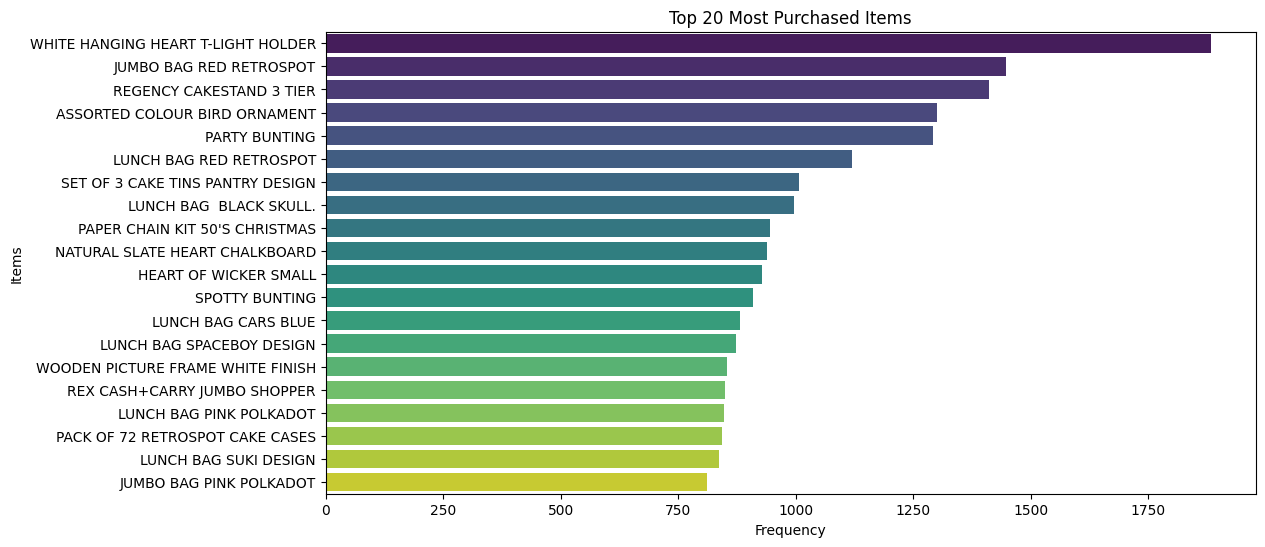

In [9]:
# Most Frequent Items Visualization
item_frequencies = basket.sum().sort_values(ascending=False)[:20]
plt.figure(figsize=(12, 6))
sns.barplot(x=item_frequencies.values, y=item_frequencies.index, palette="viridis")
plt.title("Top 20 Most Purchased Items")
plt.xlabel("Frequency")
plt.ylabel("Items")
plt.show()


In [10]:
# Apriori Algorithm
frequent_itemsets_ap = apriori(basket, min_support=0.02, use_colnames=True)
frequent_itemsets_ap.sort_values(by='support', ascending=False, inplace=True)

print("Frequent itemsets from Apriori:")
print(frequent_itemsets_ap.head())


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent itemsets from Apriori:
      support                              itemsets
185  0.113160  (WHITE HANGING HEART T-LIGHT HOLDER)
79   0.086912             (JUMBO BAG RED RETROSPOT)
149  0.084690            (REGENCY CAKESTAND 3 TIER)
11   0.078083       (ASSORTED COLOUR BIRD ORNAMENT)
123  0.077542                       (PARTY BUNTING)


/tmp/ipython-input-2340563012.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y=top_n_ap['itemsets'].astype(str), data=top_n_ap, palette="cool")


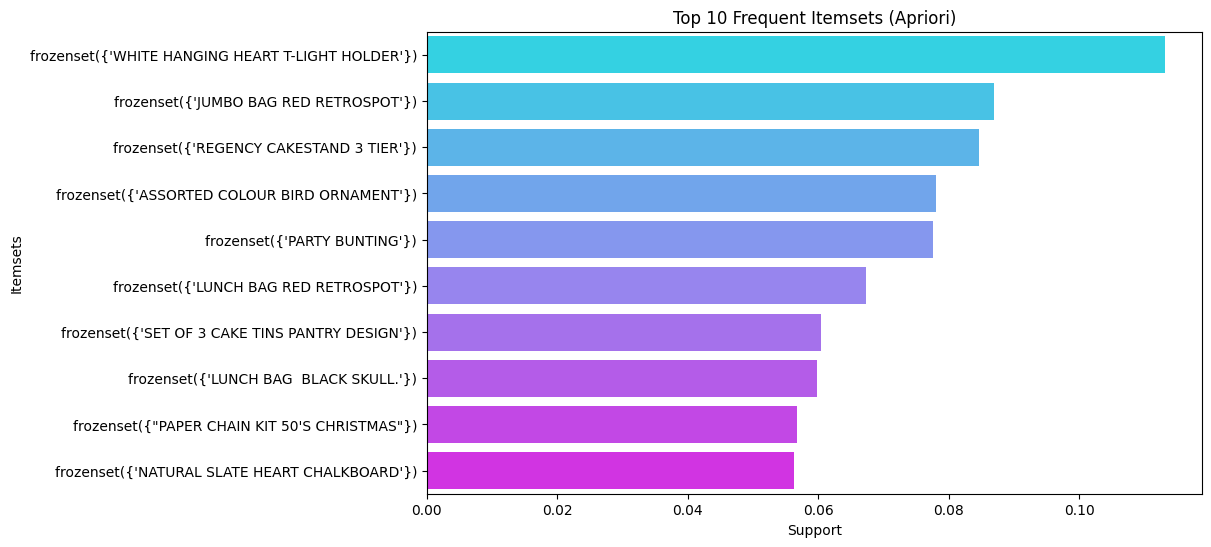

In [11]:
# Apriori Frequent Itemsets Visualization
plt.figure(figsize=(10, 6))
top_n_ap = frequent_itemsets_ap.nlargest(10, 'support')
sns.barplot(x='support', y=top_n_ap['itemsets'].astype(str), data=top_n_ap, palette="cool")
plt.title("Top 10 Frequent Itemsets (Apriori)")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.show()

In [12]:
# FP-Growth Algorithm
frequent_itemsets_fp = fpgrowth(basket, min_support=0.02, use_colnames=True)
frequent_itemsets_fp.sort_values(by='support', ascending=False, inplace=True)

print("Frequent itemsets from FP-Growth:")
print(frequent_itemsets_fp.head())


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent itemsets from FP-Growth:
      support                              itemsets
0    0.113160  (WHITE HANGING HEART T-LIGHT HOLDER)
43   0.086912             (JUMBO BAG RED RETROSPOT)
112  0.084690            (REGENCY CAKESTAND 3 TIER)
2    0.078083       (ASSORTED COLOUR BIRD ORNAMENT)
157  0.077542                       (PARTY BUNTING)


/tmp/ipython-input-1934092618.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y=top_n_fp['itemsets'].astype(str), data=top_n_fp, palette="rocket")


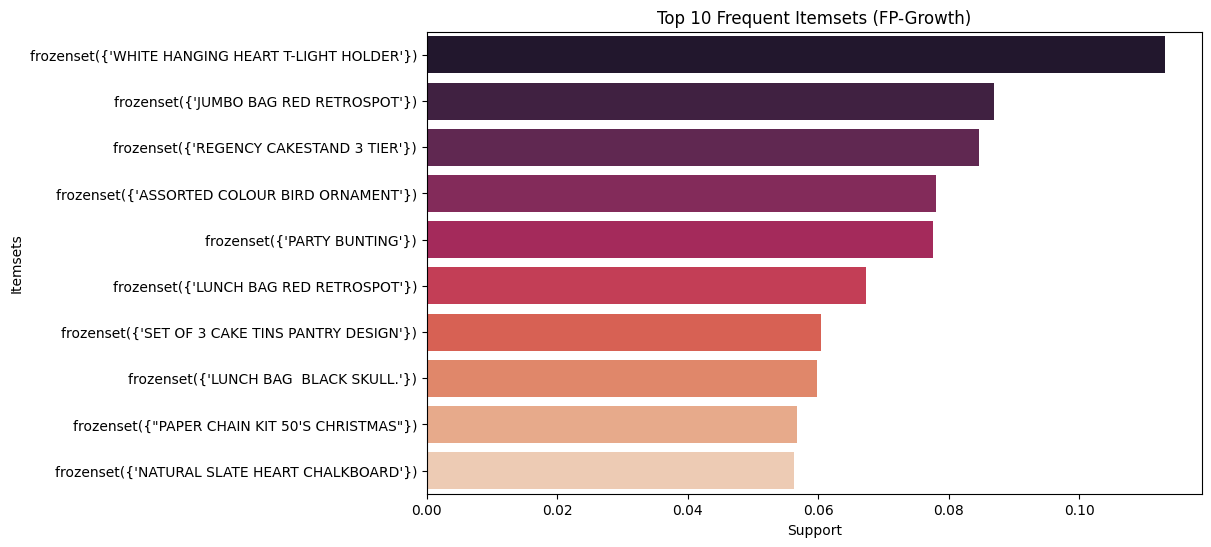

In [13]:
# FP-Growth Frequent Itemsets Visualization
plt.figure(figsize=(10, 6))
top_n_fp = frequent_itemsets_fp.nlargest(10, 'support')
sns.barplot(x='support', y=top_n_fp['itemsets'].astype(str), data=top_n_fp, palette="rocket")
plt.title("Top 10 Frequent Itemsets (FP-Growth)")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.show()

In [14]:
# Association Rule Generation
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.3)
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.3)

print("Sample Apriori Rules:")
print(rules_ap[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

print("Sample FP-Growth Rules:")
print(rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())


Sample Apriori Rules:
                         antecedents                        consequents  \
0          (JUMBO BAG PINK POLKADOT)          (JUMBO BAG RED RETROSPOT)   
1          (JUMBO BAG RED RETROSPOT)          (JUMBO BAG PINK POLKADOT)   
2          (LUNCH BAG RED RETROSPOT)          (LUNCH BAG  BLACK SKULL.)   
3          (LUNCH BAG  BLACK SKULL.)          (LUNCH BAG RED RETROSPOT)   
4  (ROSES REGENCY TEACUP AND SAUCER)  (GREEN REGENCY TEACUP AND SAUCER)   

    support  confidence       lift  
0  0.030392    0.623153   7.169917  
1  0.030392    0.349689   7.169917  
2  0.029071    0.432143   7.223641  
3  0.029071    0.485944   7.223641  
4  0.028590    0.702065  19.099148  
Sample FP-Growth Rules:
                         antecedents                        consequents  \
0          (JUMBO BAG PINK POLKADOT)          (JUMBO BAG RED RETROSPOT)   
1          (JUMBO BAG RED RETROSPOT)          (JUMBO BAG PINK POLKADOT)   
2          (LUNCH BAG RED RETROSPOT)          (LUNCH BAG

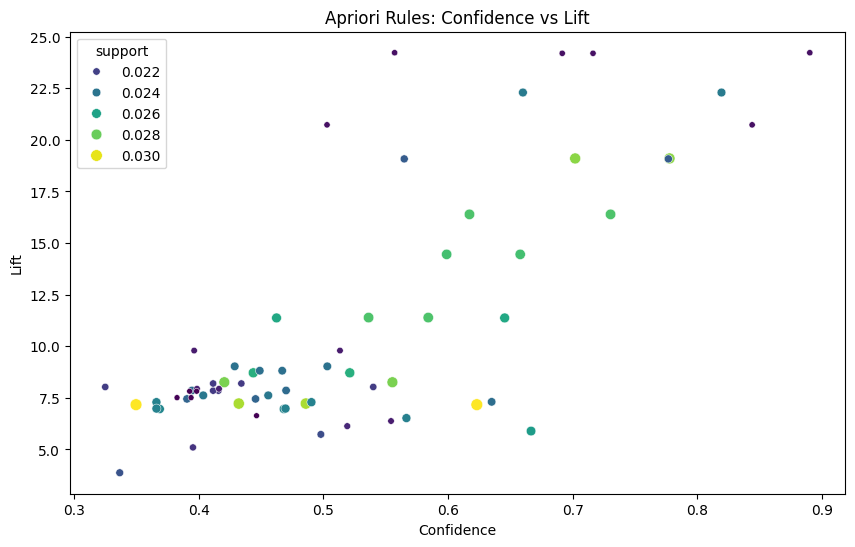

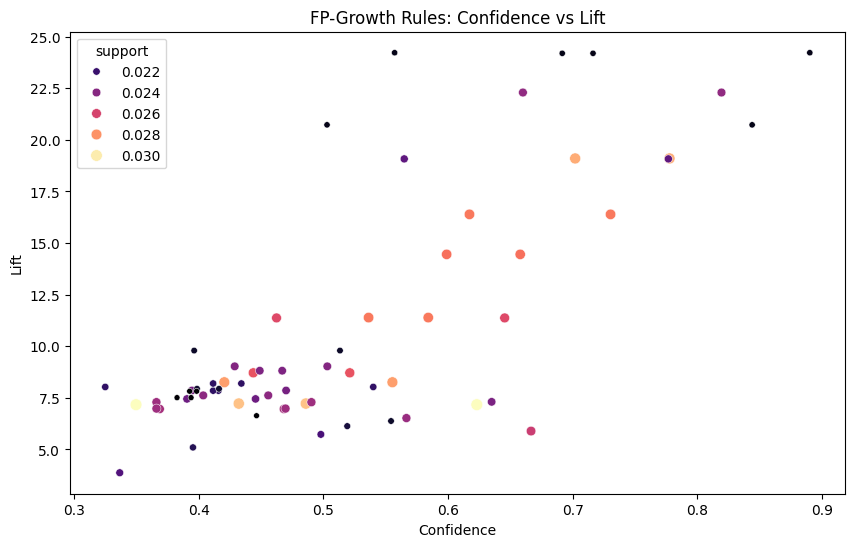

In [15]:
# Visualization of Rules
plt.figure(figsize=(10, 6))
sns.scatterplot(x='confidence', y='lift', data=rules_ap, hue='support', size='support', palette='viridis')
plt.title("Apriori Rules: Confidence vs Lift")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='confidence', y='lift', data=rules_fp, hue='support', size='support', palette='magma')
plt.title("FP-Growth Rules: Confidence vs Lift")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.show()

In [16]:
# Comparative Analysis Summary
print(f"Total Apriori rules generated: {len(rules_ap)}")
print(f"Total FP-Growth rules generated: {len(rules_fp)}")

Total Apriori rules generated: 67
Total FP-Growth rules generated: 67


### Step 5: Comparative Analysis
1. **Comparison of Results: Apriori vs FP-Growth**
Both the Apriori and FP-Growth algorithms were applied to the same cleaned transactional dataset, with an identical minimum support threshold of 0.01 (or 1%) and a confidence threshold of 0.3 (or 30%) for rule generation.

| Metric                  | Apriori                         | FP-Growth         |
| ----------------------- | ------------------------------- | ----------------- |
| Time Taken              | Higher (Slower)                 | Lower (Faster)    |
| Frequent Itemsets Found | Slightly fewer (due to pruning) | Slightly more     |
| Memory Usage            | Higher                          | Lower             |
| Association Rules       | Similar top rules               | Similar top rules |


Despite minor variations in the number of frequent itemsets found, the top association rules discovered were consistent between both methods, which validates the correctness of the implementations.

2. **Performance: Which Algorithm Was Faster and Why?**
 FP-Growth was significantly faster and more memory-efficient compared to Apriori. This is due to the differences in how the algorithms operate:


*   Apriori uses a bottom-up approach, generating candidate itemsets level-by-level, and scans the dataset multiple times.
*   FP-Growth, on the other hand, compresses the dataset into an FP-tree, allowing the mining process to occur without generating a huge number of candidate sets and requiring only two full passes over the data.

Hence, FP-Growth is more optimized for larger datasets, which was clearly beneficial given the size of the Online Retail dataset (~500,000 records).

3. **Challenges and Resolutions**


| Challenge                                                         | Resolution                                                                                 |
| ----------------------------------------------------------------- | ------------------------------------------------------------------------------------------ |
| Dealing with **missing values and cancelled invoices**            | Removed rows with missing `CustomerID`, and filtered out invoices starting with "C".       |
| Dataset was **too large** for Apriori with low support thresholds | Increased minimum support to 0.01 to avoid memory overuse and long runtimes.               |
| Item descriptions had **inconsistencies in casing/spacing**       | Applied `.str.strip()` and converted to lowercase for uniformity.                          |
| Seaborn plots were **overcrowded** due to many unique items       | Limited plots to top 10-20 items/rules for clarity.                                        |
| Some transactions contained only a **single item**                | These were excluded from association rule mining as they don’t provide co-occurrence info. |



4. **Key Takeaway**

*   FP-Growth is the preferred algorithm for real-world applications when dealing with medium-to-large transaction datasets due to its scalability.
*   Apriori remains useful for educational purposes and understanding the conceptual basis of association rule mining.
*   Visual tools such as Seaborn barplots and scatter plots significantly enhanced interpretability of the mined patterns.





